In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Honors Program/honors/honors_data

/content/drive/.shortcut-targets-by-id/15JtMaqUj0g0u5Rfig5mYfKaeRPqMjZ6o/honors/honors_data


In [ ]:
%%capture
!pip install bertopic

In [ ]:
from bertopic import BERTopic

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('completed_data.xlsx')
content = data['博文内容']

In [ ]:
timestamps = data['时间'].to_list()
texts = content.to_list()

## 生成主题

In [ ]:
topic_model = BERTopic(language="multilingual")
topics, probs = topic_model.fit_transform(texts)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# topic_model = BERTopic.load("/content/drive/MyDrive/Honors Program/honors/BERTopic/3.29/model")

In [ ]:
freq = topic_model.get_topic_info()
freq.head(11)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,116309,-1_市场_指数_大盘_反弹,"[市场, 指数, 大盘, 反弹, 下跌, 上涨, 行情, 机会, 个股, a股]","[['A股', '反弹', '乏力', '转跌', '白酒', '回调', '现', '一日..."
1,0,2578,0_医疗_医药_药业_疫苗,"[医疗, 医药, 药业, 疫苗, 生物, 疫情, 医院, 制药, 中药, 新冠]","[['中药', '太极集团', '华润', '三九', '康缘', '药业', '昆药', ..."
2,1,1597,1_ai_人工智能_模型_算力,"[ai, 人工智能, 模型, 算力, 昆仑, 万维, 剑桥, 伟达, aigc, 服务器]","[['AI', '人工智能', '产业链', '梳理', '下周', '科技', '板块',..."
3,2,1067,2_净利润_同比_营业_收入,"[净利润, 同比, 营业, 收入, 增长, 归属于, 每股, 上半年, 归母, 半年度]","[['杭州', '银行', '年', '净利', '亿元', '同比', '增长', '杭州..."
4,3,755,3_昨天_保定_贴单_提示,"[昨天, 保定, 贴单, 提示, 验证, 昨天下午, 尾盘, 跟上, 四行, 割肉]","[['昨天', '补'], ['昨天', 't'], ['昨天', '说']]"
5,4,728,4_黄金_空单_美金_金牌,"[黄金, 空单, 美金, 金牌, 咨金, 那契, 现货, 快手, 外汇, 天汇论]","[['黄金', '分析'], ['黄金', '投资', '关注'], ['黄金', '坑']]"
6,5,728,5_华为_该股_鸿蒙_手机,"[华为, 该股, 鸿蒙, 手机, 设备, 零部件, 星闪, 主营业务, 光学, 通信]","[['华为', '无人驾驶', '奥普', '光电', '光机所', '唯一', '控股',..."
7,6,722,6_明天_明日_开业_几股,"[明天, 明日, 开业, 几股, 厂子, 无股, 下班, 看涨, 开门红, 开市]","[['明天', '泄'], ['明天', '新'], ['明天', '躺']]"
8,7,585,7_直真_掌阅_恒久_科技,"[直真, 掌阅, 恒久, 科技, 科技股, 众合, 三变, 传艺, 芯能, 求涨]","[['直真', '科技', 'sz', '成功', '版'], ['直真', '科技', '..."
9,8,578,8_净入_净出_三日_主买,"[净入, 净出, 三日, 主买, 万买, 龙一, 前日, 桑田, 万人次, 盟主]","[['游资', '大佬', '忙点', '席位', '跟踪', '现', '真身', '章'..."


In [ ]:
topic_labels = {
    -1: "General Market",
    0: "Medical Care",
    1: "Artificial Intelligence",
    2: "Revenues",
    3: "Past Performance",
    4: "Gold",
    5: "Technology",
    6: "Future Performance",
    7: "Tech Stocks",
    8: "Stock Trading",
    9: "Stock Indexes"
}

topic_model.set_topic_labels(topic_labels)

In [ ]:
topic_model.save("model", serialization="pickle")

2024-03-29 04:41:00,682 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


## 下载主题分类

In [ ]:
data['主题标签'] = topics

In [ ]:
data

,时间,博文内容,内容,主题标签
0,2017-07-13 15:16:37,"['吃', '奶粉', '孩子', '胖', '奶粉', '中有', '数倍', '母乳',...",吃奶粉的孩子的确更容易胖因为奶粉中有数倍于母乳的脂肪和蛋白质是宝宝不需要的而且会造成体重过量...,-1
1,2017-07-14 12:06:18,['双横臂'],双横臂,-1
2,2017-07-14 14:46:46,"['主属', '客户', '证件', '重复', '客户', '合并']",主属客户证件重复客户合并,-1
3,2017-07-14 15:11:15,['撑'],撑,-1
4,2017-07-14 15:18:05,"['人要', '赚钱', '养家活口', '听', '音乐', '投资', '开车', '玩...",人要赚钱养家活口听音乐投资开车玩手机,-1
...,...,...,...,...
191455,2023-09-24 23:02:44,"['倍量', '山峰', '形态', '用法', '前期', '经历', '一轮', '上涨...",股票超话倍量过山峰的形态用法前期经历一轮上涨形成一个高点形成一个像山峰一样也是形成的压力位经...,-1
191456,2023-09-24 23:02:59,"['分时图', '盘升', '信号', '案例', '分析', '假', '顶上', '行'...",股票超话分时图盘升信号案例分析假顶上行趋势未改K线处在回调后向上修复阶段修复能否成功关键在能...,-1
191457,2023-09-24 23:03:09,"['周末', '利好', '利空消息', '安静', '如鸡', '双节', '明天', '...",本周末既没有利好也没有利空消息安静如鸡快过双节了明天应该开盘没有惊喜也没有惊吓了基金股票晚安,763
191458,2023-09-24 23:03:45,"['吉宏', '股份', '前', '三季度', '净利润', '同比', '预增吉宏', ...",吉宏股份前三季度净利润同比预增吉宏股份月日晚间发布业绩预告前三季度预计实现净利润亿元亿元比上...,2


In [ ]:
data.to_excel('completed_data_with_topics_new.xlsx', index=False)

## 主题相对频次

In [ ]:
# cd /content/drive/MyDrive/Honors Program/honors/BERTopic

/content/drive/.shortcut-targets-by-id/15JtMaqUj0g0u5Rfig5mYfKaeRPqMjZ6o/honors/BERTopic


In [ ]:
# data = pd.read_excel('completed_data_with_topics.xlsx')

In [ ]:
# 筛选主题标签在0到9之间的数据
selected_topics = list(range(0, 10))
selected_data = data[data['主题标签'].isin(selected_topics)]

In [ ]:
selected_data

,时间,博文内容,内容,主题标签
30,2017-07-16 22:11:01,"['智慧', '城市', '智能', '终端', '组建', '城市', '局域网', '物...",智慧城市智能终端是组建城市局域网移动物联网的核心由无线骨干传输车地通讯系统综合信息采集感知系...,5
44,2017-07-18 16:54:43,"['银河', '生物', '控股', '股东', '质押', '触及', '平仓', '线'...",银河生物控股股东质押股票触及平仓线股票停牌银河生物周二晚间公告因控股股东银河集团部分质押的公...,0
56,2017-07-19 14:33:46,"['日本', '高', '收入', '国家', '里', '乘坐', '公里', '新干线'...",在日本这样的高收入国家里乘坐公里的新干线支出元人民币只相当于普通公司职员一天的收入所以普通日...,2
59,2017-07-19 15:31:29,"['手机', '元器件', '组成部分', '包括', '芯片', '屏幕', '内存', ...",手机的重要元器件的组成部分包括芯片屏幕内存闪存摄像头芯片等几乎全被国际大厂垄断核心元器件大概...,5
81,2017-07-21 18:52:24,"['昨天', '跌', '真烦']",昨天跟今天跌的真烦,3
...,...,...,...,...
191429,2023-09-24 21:54:38,"['周一', '股市', '热点', '预测', '第一', '华为', '产业链', '数...",周一股市热点预测第一华为产业链数字机器人第二芯片半导体电子信息消费光通信G第三化工有色券商第...,5
191436,2023-09-24 22:14:31,"['挖掘', '未来', '热点', '教育软件', '天选']",股票挖掘一个未来热点教育软件天选,7
191438,2023-09-24 22:22:15,"['好了吗', '明天', '操作']",股票准备好了吗明天继续操作,6
191443,2023-09-24 22:59:02,"['周三', '市场', '主线', '猜想', 'AI', '人工智能', 'CPO', ...",股票超话下周三大市场主线猜想AI人工智能CPO券商AI人工智能AI大模型全面爆发技术飞速进步...,1


### 每月

In [ ]:
# 提取年份和月份作为新的列
selected_data['年份'] = selected_data['时间'].dt.year
selected_data['月份'] = selected_data['时间'].dt.month

# 计算每月不同主图标签在当月所有帖子中的比例
monthly_topic_counts = selected_data.groupby(['年份', '月份', '主题标签']).size().reset_index(name='主题帖子数')
monthly_total_counts = selected_data.groupby(['年份', '月份']).size().reset_index(name='总帖子数')
monthly_topic_ratios = monthly_topic_counts.merge(monthly_total_counts, on=['年份', '月份'])
monthly_topic_ratios['比例'] = monthly_topic_ratios['主题帖子数'] / monthly_topic_ratios['总帖子数']

In [ ]:
# 创建一个包含所有可能年份、月份和主题的DataFrame
all_combinations = pd.DataFrame([(year, month, topic) for year in range(selected_data['年份'].min(), selected_data['年份'].max() + 1)
                                              for month in range(1, 13)
                                              for topic in range(10)], columns=['年份', '月份', '主题标签'])

# 合并数据以填充缺失值
merged_data = pd.merge(all_combinations, monthly_topic_ratios, on=['年份', '月份', '主题标签'], how='left')

In [ ]:
merged_data

,年份,月份,主题标签,主题帖子数,总帖子数,比例
0,2017,1,0,NaN,NaN,NaN
1,2017,1,1,NaN,NaN,NaN
2,2017,1,2,NaN,NaN,NaN
3,2017,1,3,NaN,NaN,NaN
4,2017,1,4,NaN,NaN,NaN
...,...,...,...,...,...,...
835,2023,12,5,NaN,NaN,NaN
836,2023,12,6,NaN,NaN,NaN
837,2023,12,7,NaN,NaN,NaN
838,2023,12,8,NaN,NaN,NaN


In [ ]:
indices_to_drop = list(range(0, 60)) + list(range(810, 840))
monthly_ratios = merged_data.drop(indices_to_drop)

In [ ]:
# 将缺失的比例填充为0
monthly_ratios['主题帖子数'] = monthly_ratios['主题帖子数'].fillna(0)
monthly_ratios['总帖子数'] = monthly_ratios['总帖子数'].fillna(0)
monthly_ratios['比例'] = monthly_ratios['比例'].fillna(0)

In [ ]:
monthly_ratios

,年份,月份,主题标签,主题帖子数,总帖子数,比例
60,2017,7,0,4.0,14.0,0.285714
61,2017,7,1,0.0,0.0,0.000000
62,2017,7,2,3.0,14.0,0.214286
63,2017,7,3,1.0,14.0,0.071429
64,2017,7,4,0.0,0.0,0.000000
...,...,...,...,...,...,...
805,2023,9,5,190.0,585.0,0.324786
806,2023,9,6,27.0,585.0,0.046154
807,2023,9,7,40.0,585.0,0.068376
808,2023,9,8,45.0,585.0,0.076923


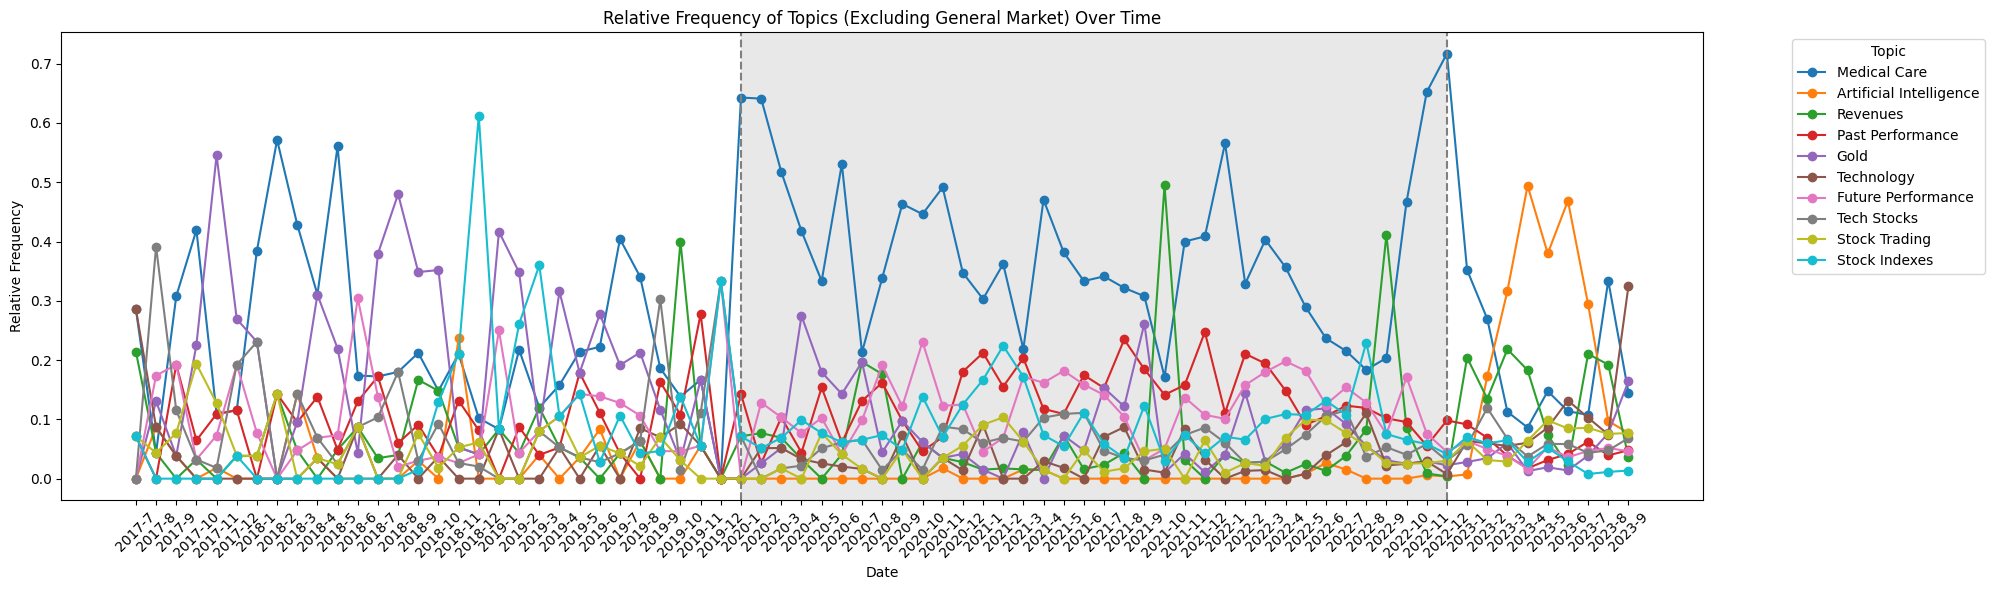

In [ ]:
# 主题标签
labels = {
    -1: "General Market",
    0: "Medical Care",
    1: "Artificial Intelligence",
    2: "Revenues",
    3: "Past Performance",
    4: "Gold",
    5: "Technology",
    6: "Future Performance",
    7: "Tech Stocks",
    8: "Stock Trading",
    9: "Stock Indexes"
}

# 绘图
plt.figure(figsize=(20, 6))
for topic in range(0, 10):
    topic_data = monthly_ratios[monthly_ratios['主题标签'] == topic]
    topic_name = labels[topic]
    plt.plot(topic_data['年份'].astype(str) + '-' + topic_data['月份'].astype(str), topic_data['比例'], marker='o', linestyle='-', label=topic_name)

plt.title('Relative Frequency of Topics (Excluding General Market) Over Time')
plt.xlabel('Date')
plt.ylabel('Relative Frequency')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.axvline(x='2020-1', color='grey', linestyle='--', label='2020-1')
plt.axvline(x='2022-12', color='grey', linestyle='--', label='2022-12')
plt.axvspan('2020-1', '2022-12', facecolor='lightgray', alpha=0.5)

plt.show()

In [ ]:
monthly_ratios.to_excel('monthly_topic_ratios_new.xlsx', index=False)

In [ ]:
# monthly_topic_ratios = pd.read_excel('monthly_topic_ratios.xlsx')

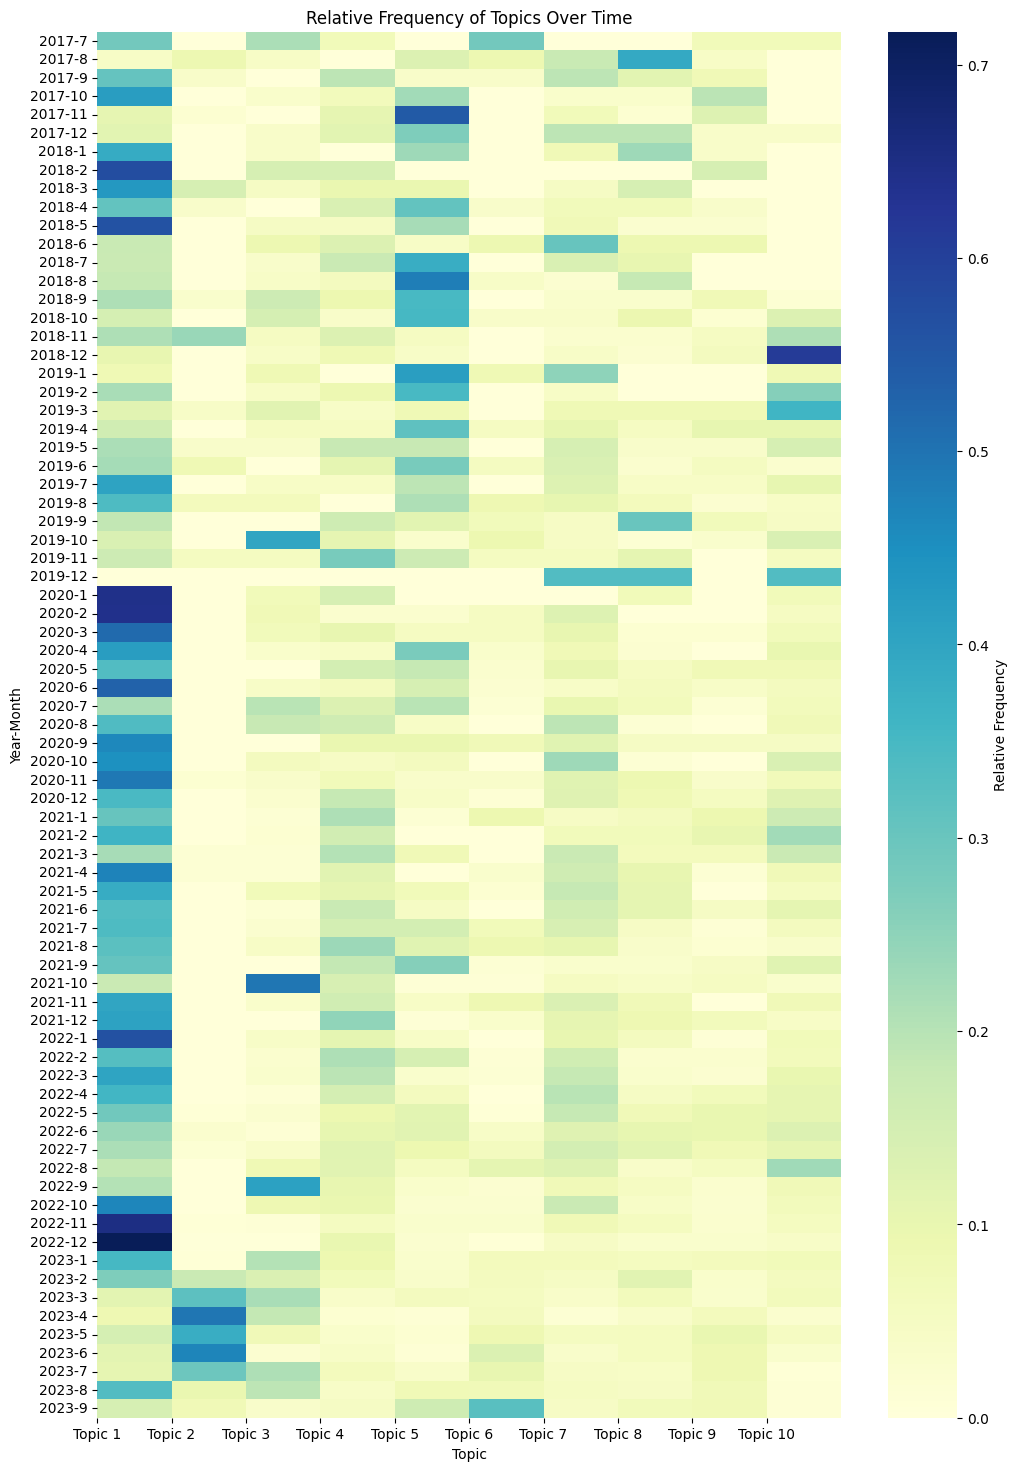

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 创建一个透视表，以年份和月份为索引，主题标签为列，并计算每个组合的平均比例
heatmap_data = monthly_ratios.pivot_table(index=['年份', '月份'], columns='主题标签', values='比例', aggfunc='mean')

# 绘制热力图
plt.figure(figsize=(12, 18))
sns.heatmap(heatmap_data, annot=False, cmap='YlGnBu', cbar_kws={'label': 'Relative Frequency'})
plt.title('Relative Frequency of Topics Over Time')
plt.xlabel('Topic')
plt.ylabel('Year-Month')
plt.xticks(ticks=range(10), labels=[f'Topic {i+1}' for i in range(10)])
plt.show()

### 每月Top 2

In [ ]:
# 按照年份和月份分组，并找出每组中比例最高的前两个主题
top_topics = (
    monthly_ratios
    .groupby(['年份', '月份'])
    .apply(lambda x: x.nlargest(2, '比例'))
    .reset_index(drop=True)
)

# 将labels转换为DataFrame
labels_df = pd.DataFrame(list(labels.items()), columns=['主题标签', '主题'])

# 将top_topics与labels合并
top_topics_with_labels = top_topics.merge(labels_df, on='主题标签', how='left')

In [ ]:
top_topics_with_labels.to_excel('top_topics_over_time_new.xlsx', index=False)

### 3 Stages

In [ ]:
# 划分阶段
stages = {
    'Pre-COVID': (2017, 2019),
    'During-COVID': (2020, 2022),
    'Post-COVID': (2023, 2023)
}

st = []
label = []
ratio = []

# 计算每个阶段的主题相对频次平均值
for stage, (start_date, end_date) in stages.items():
    stage_data = monthly_ratios[(monthly_ratios['年份'] >= start_date) & (monthly_ratios['年份'] <= end_date)]
    stage_mean_topic_ratios = stage_data.groupby('主题标签')['比例'].mean().reset_index()
    for i in range(0,10):
        st.append(stage)
        label.append(stage_mean_topic_ratios['主题标签'][i])
        ratio.append(stage_mean_topic_ratios['比例'][i])

stage_topic_ratios = pd.DataFrame({'阶段': st, '主题标签': label, '比例': ratio})

In [ ]:
stage_topic_ratios

,阶段,主题标签,比例
0,Pre-COVID,0,0.232893
1,Pre-COVID,1,0.028884
2,Pre-COVID,2,0.069100
3,Pre-COVID,3,0.091388
4,Pre-COVID,4,0.203214
5,Pre-COVID,5,0.036796
6,Pre-COVID,6,0.100101
7,Pre-COVID,7,0.094037
8,Pre-COVID,8,0.050910
9,Pre-COVID,9,0.092678


In [ ]:
# 使用 pivot_table 转换数据
pivot_table = stage_topic_ratios.pivot_table(index='主题标签', columns='阶段', values='比例', fill_value=0)

# 计算每个阶段的平均值
mean_values = pivot_table.mean(axis=1).to_frame(name='Average')
pivot_table = pd.concat([pivot_table, mean_values], axis=1)

# 添加 Label 列
labels_df = pd.DataFrame({'Topic': pivot_table.index, 'Label': [labels[label] for label in pivot_table.index]})
pivot_table = pd.concat([labels_df, pivot_table], axis=1)

pivot_table = pivot_table.round(2)

# 重新排列列的顺序
pivot_table = pivot_table[[ 'Topic', 'Label', 'Pre-COVID', 'During-COVID', 'Post-COVID', 'Average']]

In [ ]:
pivot_table

,Topic,Label,Pre-COVID,During-COVID,Post-COVID,Average
0,0,Medical Care,0.23,0.39,0.19,0.27
1,1,Artificial Intelligence,0.03,0.00,0.26,0.10
2,2,Revenues,0.07,0.06,0.14,0.09
3,3,Past Performance,0.09,0.13,0.05,0.09
4,4,Gold,0.20,0.08,0.05,0.11
5,5,Technology,0.04,0.03,0.11,0.06
6,6,Future Performance,0.10,0.12,0.04,0.09
7,7,Tech Stocks,0.09,0.06,0.06,0.07
8,8,Stock Trading,0.05,0.04,0.07,0.05
9,9,Stock Indexes,0.09,0.09,0.04,0.07


In [ ]:
pivot_table.to_excel('stage_topic_ratios_new.xlsx', index=False)